# Stage One the most simple model

## To do
- [v] build initial WS graph
- [v] design the agent
- [v]design how information pass (currently undirected)
iterate with 1)differnt patient zero/patient zero group 2)different contagence 3)different network
robostness 1)noise 2)different position 

## Mechanism 
1. generate simple WS graph
2. seed a agent and all* its neighbor 
3. spead step
    1) check the infected neighbors 
    2) sum up infection number 
    3) if inf >= tresh then alpha chance getting infected  ->  we assume this is propensity to reshare 
    4) no random noise*, no linear or nonlinear recovery*, no heterogeniety in treshold*, no immunity*
4. since there's only one information being passed around and there's no recovery, the information will eventually spread the whole network and we measure the time
   1) measure the propotion of infected after time t
   2) if every one get infected, when (speed)

\* means that I can change the parameter there
\** means that I'm already changing its parameter

n=100 for group size
small, mid, large for clustering effect of WS graph
number of neighbors, treshold, adopting v sharing (use sharing)
use sharing in the simple model 

benefir visibile and researchers have a handle on 



## 1 - make WS graph (with explicit code)
### to-do
[ ] find out the most efficient ways to generate WS graph

In [1]:
#for the seperate python doucument
from __future__ import print_function, division

%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import thinkplot

import networksimulator as ns
COLORS = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462',
          '#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5','#ffed6f']

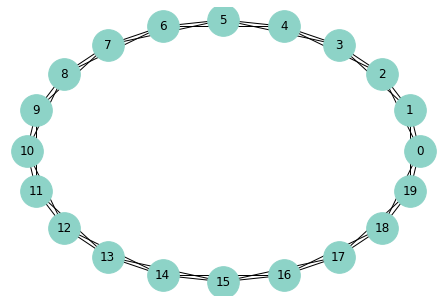

In [2]:
lattice = ns.make_ring_lattice(20, 5)
nx.draw_circular(lattice, 
                 node_color=COLORS[0], 
                 node_size=1000, 
                 with_labels=True)

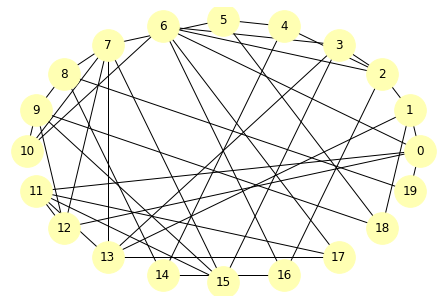

In [3]:
ws = ns.make_ws_graph(20, 5, 0.6)
nx.draw_circular(ws, 
                 node_color=COLORS[1], 
                 node_size=1000, 
                 with_labels=True)

In [4]:
#checking clustering and average path length
(nx.average_clustering(ws),
nx.average_clustering(lattice),
nx.average_shortest_path_length(ws),
nx.average_shortest_path_length(lattice))

(0.08666666666666666, 0.5, 2.1210526315789475, 2.8947368421052633)

In [5]:
len(lattice.edges()), len(ws.edges())

(40, 40)

## 2- design the agent

In [6]:
class agent:
    def __init__(self,i):
        self.infected = 0 #network started with no one beliving a specific peice of info, 
        self.index = i #to keep track of 
        self.infect_treshold = 2 #should be a integer
    
        
    def infect(self):
        self.infected = 1
    
    def change_tresh(self, infect_treshold_i):
        self.infect_treshold = infect_treshold_i
                

In [7]:
import random 

def initialize_network_agent(network):
    directory = {} 
    node_num = network.number_of_nodes()
    for i in range (node_num):
        directory.update({i:agent(i)})
    return directory

#change trashold
def change_all_tresh(directory,new_tresh_list):
    for i in range(len(directory)):
        agent = directory.get(i)
        agent.change_tresh(new_tresh_list[i])

In [8]:
#choose a random neighborhood to infect

def initialize_patient_zero(network, directory, percentage=1):
    x = random.randint(1,len(directory)-1) ##something wrong here but I haven't fix
    patient_zero = directory.get(x)
    patient_zero.infect()
    
    #randomly infect a portion of patient zero's network
    neighbors = [n for n in network.neighbors(x)]
  
    for i in neighbors:
        dice = random.random()
        if dice < percentage:
            patient_one = directory.get(i)
            patient_one.infect()
    return x

## 3 - Propagation

In [26]:
#propage: check if neighbors infect - random chance of infection
#I see, the problem is that this proprage the whole network, instead of spreading it in steps  

def step(network, directory):
    #first create a dictionary of number of infection
    infection_dic = {}
    for i in range(len(directory)):
        agent = directory.get(i)
        neighbors = [n for n in network.neighbors(i)]
        total_infected = 0
        for j in neighbors:
            if directory.get(j).infected == 1:
                total_infected += 1
        infection_dic.update({i:total_infected})
       
    #update all at once
    for i in range(len(directory)):
        if infection_dic.get(i) >= directory.get(i).infect_treshold:
            directory.get(i).infect()
            
    #debug step: print whoever that's infected              

## 4-Visualization for single steps

In [17]:
########## making graph ###########
#make a graph
ws = nx.watts_strogatz_graph(50, 4, 0.4, seed=11)
#initialize a network of agent
ws_di = initialize_network_agent(ws)
#initialize treshold
    
for i in range(50): #network_size
    ws_di.get(i).change_tresh(2) #treshold_index
    
#seed the rumor
initialize_patient_zero(ws,ws_di, 0.8) #patient_zero_percentage     

# numbers
infection = []
suspect = []
clean = []

In [19]:
step(ws, ws_di)

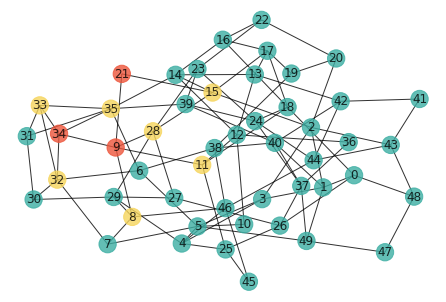

In [28]:
#visualize + keep track of infection, suspect and clean
color_map = []
#initialize
infection_num = 0
sus_num = 0
clean_num = 0

for i in range (len(ws_di)):
    #see if neighbor infected
    neighbors = [n for n in ws.neighbors(i)]
    total_infected = 0
    for j in neighbors:
        if ws_di.get(j).infected == 1:
            total_infected += 1  
    if ws_di.get(i).infected == 1:
        color_map.append('#ED553B') # red
        infection_num += 1
    elif total_infected > 0:
        color_map.append('#F6D55C') #yellow
        sus_num += 1
    else: 
        color_map.append('#3CAEA3') # green 
        
clean_num = len(ws_di) - infection_num - sus_num
infection.append(infection_num)
suspect.append(sus_num)
clean.append(clean_num)

nx.draw_kamada_kawai(ws, node_size=300,node_color=color_map, with_labels=True, alpha = 0.8)    
step(ws,ws_di)

In [128]:
suspect

[10, 13, 13, 13, 13]

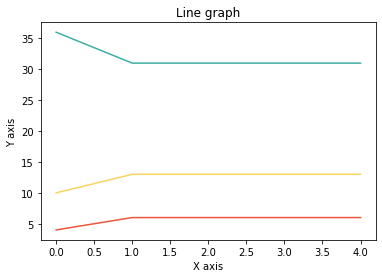

In [129]:
# build second visualization with 
import numpy as np  
import matplotlib.pyplot as plt 

# data to be plotted 
x = np.arange(0, len(suspect))  

#y = np.array(a) 
  
# plotting 
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(x, suspect, color ='#F6D55C')  # yellow
plt.plot(x, infection, color ='#ED553B') #red
plt.plot(x, clean, color ='#3CAEA3') #green
plt.show()

# 4- batch run infection problem +
Now that I made sure my code have no problem with very clear visualization, I need to figure out the bifrecation point.
Intuition told me that in this case, the network size doesn't even matter as much with the simple spreading mechaism, the rewiring factor (which lead to clustering factor matter)
I need to figure out 
- [v]how to batch run (figure out when/where to stop) the code
- [v]run 1000 times, how many round does it take to stop infecting (with same agent number, average neighbor, slightly different clustering co-efficient)     
- [v]visualize with scattered plot



In [144]:
#
def batch_run(network_size = 100 ,average_neighbor=10,rewire=0.6, patient_zero_percentage=1, treshold_index=2):
    #####set-up the graph #######
    #make a graph
    ws = nx.watts_strogatz_graph(network_size, average_neighbor, rewire, seed=11)
    #initialize a network of agent
    ws_di = initialize_network_agent(ws)
    #initialize treshold
    for i in range(network_size): #network_size
        ws_di.get(i).change_tresh(treshold_index) #treshold_index

    #seed the rumor
    initialize_patient_zero(ws,ws_di, patient_zero_percentage) #patient_zero_percentage 
    
    ##### record numbers########
    # numbers
    infection = []
    suspect = []
    clean = []

    #initialize
    infection_num = 0
    sus_num = 0
    clean_num = 0

    #record first round
    for i in range (len(ws_di)):
        #see if neighbor infected
        neighbors = [n for n in ws.neighbors(i)]
        total_infected = 0
        for j in neighbors:
            if ws_di.get(j).infected == 1:
                total_infected += 1  
        if ws_di.get(i).infected == 1: # red
            infection_num += 1
        elif total_infected > 0: #yellow
            sus_num += 1   
    clean_num = len(ws_di) - infection_num - sus_num
    infection.append(infection_num)
    suspect.append(sus_num)
    clean.append(clean_num)
    
    #play and record second round -- I could have use anotehr function but really don't worth the effort
    step(ws,ws_di)
    #initialize
    infection_num = 0
    sus_num = 0
    clean_num = 0
    for i in range (len(ws_di)): #traverse whole graph to see situation of every node
        #see if neighbor infected
        neighbors = [n for n in ws.neighbors(i)]
        total_infected = 0
        for j in neighbors:
            if ws_di.get(j).infected == 1:
                total_infected += 1  
        if ws_di.get(i).infected == 1: # red
            infection_num += 1
        elif total_infected > 0: #yellow
            sus_num += 1     
    clean_num = len(ws_di) - infection_num - sus_num
    infection.append(infection_num)
    suspect.append(sus_num)
    clean.append(clean_num)
    
    while (infection[len(infection)-1] != infection[len(infection)-2]): #if the last two elements are not the same, keep looping
        step(ws,ws_di)
         #initialize
        infection_num = 0
        sus_num = 0
        clean_num = 0
        for i in range (len(ws_di)):
            #see if neighbor infected
            neighbors = [n for n in ws.neighbors(i)]
            total_infected = 0
            for j in neighbors:
                if ws_di.get(j).infected == 1:
                    total_infected += 1  
            if ws_di.get(i).infected == 1: # red
                infection_num += 1
            elif total_infected > 0: #yellow
                sus_num += 1
        clean_num = len(ws_di) - infection_num - sus_num
        infection.append(infection_num)
        suspect.append(sus_num)
        clean.append(clean_num)

    return(infection, suspect, clean)  


In [224]:
# test batch run function
batch_run(100 ,10,0.6, 0.8, 2)

([6, 14, 43, 93, 100, 100], [43, 65, 54, 7, 0, 0], [51, 21, 3, 0, 0, 0])

In [268]:
# test first 100 round of result
# 100 agent, 10 avg nerighbor, 0.6 reqire, 0.8 initial cluster infection, 2 treshold
rounds = []
inf_percentage = []
for i in range (100):
    inf = batch_run(100 ,10,0.6, 0.8, 2)[0]
    #find out how many round
    round_num = len(inf)-1
    rounds.append(round_num)
    #find out percentage
    largest_inf = inf[len(inf)-1]
    percentage= largest_inf/100 #we have 100 agent right now
    inf_percentage.append(percentage)


(array([60., 34.,  0.,  5.,  0.,  1.]),
 array([4.        , 4.66666667, 5.33333333, 6.        , 6.66666667,
        7.33333333, 8.        ]),
 <a list of 6 Patch objects>)

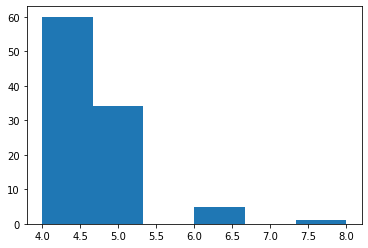

In [269]:
plt.hist(rounds, bins=6)  

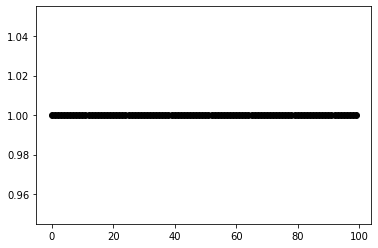

In [270]:
x = np.arange(0, len(inf_percentage))  
y = inf_percentage
plt.plot(x, y, 'o', color='black');

In [272]:
# second 100 time
#100 agent, 10 neighbor, 0.2 rewire, 0.8 patient zero, 2 treshold

rounds = []
inf_percentage = []
for i in range (100):
    inf = batch_run(100 ,10,0.2, 0.8, 2)[0]
    #find out how many round
    round_num = len(inf)-1
    rounds.append(round_num)
    #find out percentage
    largest_inf = inf[len(inf)-1]
    percentage= largest_inf/100 #we have 100 agent right now
    inf_percentage.append(percentage)

(array([ 2.,  0., 35.,  0., 57.,  6.]),
 array([4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ]),
 <a list of 6 Patch objects>)

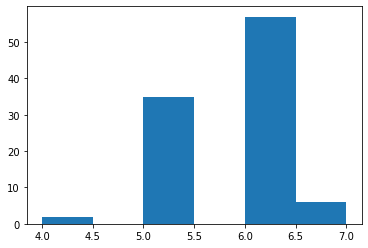

In [273]:
plt.hist(rounds, bins=6)  

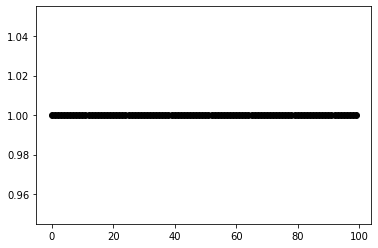

In [275]:
x = np.arange(0, len(inf_percentage))  
y = inf_percentage
plt.plot(x, y, 'o', color='black');

In [260]:
# third 100 time
#100 agent, 4 neighbor, 0.2 rewire, 0.8 patient zero, 2 treshold

rounds = []
inf_percentage = []
for i in range (100):
    inf = batch_run(100, 4,0.2, 0.8, 2)[0]
    #find out how many round
    round_num = len(inf)-1
    rounds.append(round_num)
    #find out percentage
    largest_inf = inf[len(inf)-1]
    percentage= largest_inf/100 #we have 100 agent right now
    inf_percentage.append(percentage)

sum(inf_percentage)/len(inf_percentage)

0.07199999999999995

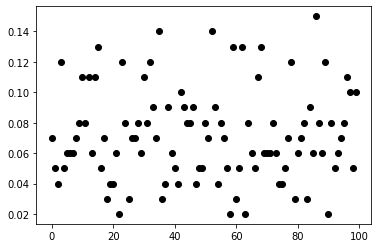

In [261]:
x = np.arange(0, len(inf_percentage))  
y = inf_percentage
plt.plot(x, y, 'o', color='black');

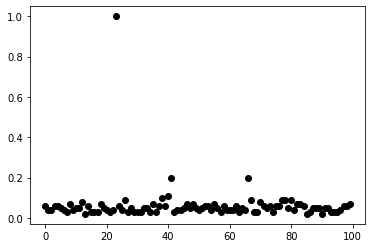

In [277]:
# second 100 time
#100 agent, 10 neighbor, 0.6 rewire, 0.8 patient zero, 2 treshold

rounds = []
inf_percentage = []
for i in range (100):
    inf = batch_run(100, 4,0.6, 0.8, 2)[0]
    #find out how many round
    round_num = len(inf)-1
    rounds.append(round_num)
    #find out percentage
    largest_inf = inf[len(inf)-1]
    percentage= largest_inf/100 #we have 100 agent right now
    inf_percentage.append(percentage)

x = np.arange(0, len(inf_percentage))  
y = inf_percentage
plt.plot(x, y, 'o', color='black'); 

(array([96.,  3.,  0.,  0.,  0.,  1.]),
 array([ 1.        ,  5.83333333, 10.66666667, 15.5       , 20.33333333,
        25.16666667, 30.        ]),
 <a list of 6 Patch objects>)

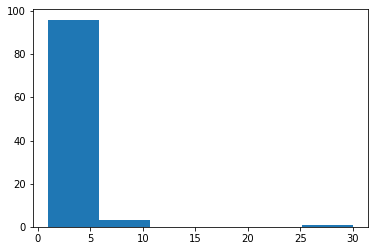

In [278]:
plt.hist(rounds, bins=6)  

## 5- Mechaism exploration
- [] run 5-10 time exploratory: relationship between 
        iv: agent number/average neighbor ; dv percentage infected
        iv: re-wireing factor (->clustering co-efficient) +  dv: and infection time 
- [] noise, sentivity


In [280]:
#intial condition for  iv: agent number/average neighbor ; dv percentage infected
agent_num = 100
average_neighbor = 4
agent_neighbor = average_neighbor/agent_num

rounds = []
inf_percentage = []
for i in range (100):
    inf = batch_run(agent_num, average_neighbor,0.6, 0.8, 2)[0]
    #find out how many round
    round_num = len(inf)-1
    rounds.append(round_num)
    #find out percentage
    largest_inf = inf[len(inf)-1]
    percentage= largest_inf/100 #we have 100 agent right now
    inf_percentage.append(percentage)

avg_pct_inf= sum(inf_percentage)/len(inf_percentage)

(agent_neighbor,avg_pct_inf)

(0.04, 0.05019999999999997)

In [307]:
#run 20 times of the  iv: agent number/average neighbor ; dv percentage infected and have scatter plot
import random

def explore_percentage_infected():
    agent_neighbor_list = []
    avg_pct_inf_list = []
    
    for i in range(10):
        agent_num = 100
        average_neighbor = random.randint(1,101)
        agent_neighbor = average_neighbor/agent_num
        
        rounds = []
        inf_percentage = []
        
        for i in range (100):
            inf = batch_run(agent_num, average_neighbor,0.6, 0.8, 2)[0]
            #find out how many round
            round_num = len(inf)-1
            rounds.append(round_num)
            #find out percentage
            largest_inf = inf[len(inf)-1]
            percentage= largest_inf/100 #we have 100 agent right now
            inf_percentage.append(percentage)

            avg_pct_inf= sum(inf_percentage)/len(inf_percentage)

            agent_neighbor_list.append(agent_neighbor)
            avg_pct_inf_list.append(avg_pct_inf)
        
    return(agent_neighbor_list,avg_pct_inf_list)

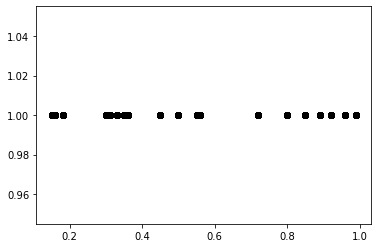

In [305]:
lis = explore_percentage_infected()

plt.plot(lis[0], lis[1], 'o', color='black'); 

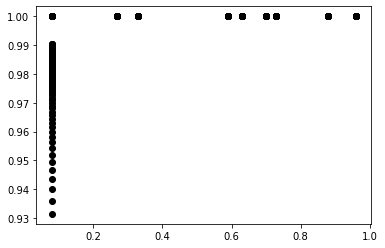

In [308]:
lis = explore_percentage_infected()

plt.plot(lis[0], lis[1], 'o', color='black'); 

In [ ]:
# second iv: re-wireing factor (->clustering co-efficient) +  dv: and infection time 

# Complex mechanism
1. from infection to sharing
2. different type of randomness
    1) normal distribution, long tail ... (need papers to support)
    2) no random noise
    3) no linear or nonlinear recovery
3. herogeniety in agents:
    1) heterogeniety in treshold,
    2) immunity
    
    
 --- so far everything assume random distribution -----
 
 1. agents gave x% chance of randomly changing their belief between 0 and 1
 2. recovery - after x round, agents automatically switch back from 1 to 0
 3. competing information (how to model it?)
 4. give agents different treshold (can be hard to back by literature tho)

# Appendix - legacy code

## 1- batch run code

In [10]:


def run_rumor_simulation(network_size = 100 ,average_path=10,rewire=0.6, patient_zero_percentage=1,treshold_index=2):
    ########## making graph ###########
    #make a graph
    ws = ns.make_ws_graph(network_size,average_path,rewire)
    #initialize a network of agent
    ws_di = initialize_network_agent(ws)
    #initialize treshold
    
    for i in range(network_size):
        ws_di.get(i).change_tresh(treshold_index)
    
    #seed the rumor
    initialize_patient_zero(ws,ws_di,patient_zero_percentage)
    #initial infection
    tot_inf = 0
    for i in range(len(ws_di)):
        tot_inf += ws_di.get(i).infected 

    #total infection
    tot_inf_list = []
    rounds_list = []
    rounds = 0
    tot_inf_list.append(tot_inf)
    rounds_list.append(rounds)
    
    # have to run two rounds first
    for i in range(2):
        tot_inf = 0 #reset
        step(ws,ws_di)
        for i in range(len(ws_di)):
            tot_inf += ws_di.get(i).infected    
        rounds += 1
        tot_inf_list.append(tot_inf)
        rounds_list.append(rounds)    
        
    # end if no more infection are detected
    while (tot_inf != tot_inf_list[len(tot_inf_list)-2] ):#if the last two elements are not the same, keep looping
        tot_inf = 0 #reset
        for i in range(len(ws_di)):
            tot_inf += ws_di.get(i).infected    
        step(ws,ws_di)
        rounds += 1
        tot_inf_list.append(tot_inf)
        rounds_list.append(rounds)
        
    return(tot_inf_list, rounds_list)

In [36]:
run_rumor_simulation(100,15,0.6,0.8,2)

([10, 28, 92, 92], [0, 1, 2, 3])

## 2 - whole network proprage

In [ ]:
def propage(network, directory):
    for i in range(len(directory)):
        agent = directory.get(i)
        if agent.infected == 0:
            neighbors = [n for n in network.neighbors(i)]
            total_infected = 0
            for j in neighbors:
                if directory.get(j).infected == 1:
                    total_infected += 1
            if total_infected >= agent.infect_treshold:
                agent.infect()

## 3- find out times for total infection

In [11]:
def run_rumor_simulation(network_size = 100 ,average_path=10,rewire=0.6, patient_zero_percentage=1,treshold_index=2):
    ########## making graph ###########
    #make a graph
    ws = ns.make_ws_graph(network_size,average_path,rewire)
    #initialize a network of agent
    ws_di = initialize_network_agent(ws)
    #initialize treshold
    
    for i in range(network_size):
        ws_di.get(i).change_tresh(treshold_index)
    
    #seed the rumor
    initialize_patient_zero(ws,ws_di,patient_zero_percentage)
    #initial infection
    tot_inf = 0
    for i in range(len(ws_di)):
        tot_inf += ws_di.get(i).infected 

    #total infection
    tot_inf_list = []
    rounds_list = []
    rounds = 0
    tot_inf_list.append(tot_inf)
    rounds_list.append(rounds)
    
    # have to run two rounds first
    for i in range(2):
        tot_inf = 0 #reset
        propage(ws,ws_di)
        for i in range(len(ws_di)):
            tot_inf += ws_di.get(i).infected    
        rounds += 1
        tot_inf_list.append(tot_inf)
        rounds_list.append(rounds)    
        
    # end if no more infection are detected
    while (tot_inf != tot_inf_list[len(tot_inf_list)-2] ):#if the last two elements are not the same, keep looping
        tot_inf = 0 #reset
        for i in range(len(ws_di)):
            tot_inf += ws_di.get(i).infected    
        propage(ws,ws_di)
        rounds += 1
        tot_inf_list.append(tot_inf)
        rounds_list.append(rounds)
        
    return(tot_inf_list, rounds_list)

In [12]:
run_rumor_simulation(100,15,0,0.8,4)

([14, 42, 100, 100], [0, 1, 2, 3])

In [15]:
run_rumor_simulation(100,5,0,0.8,2)

([2, 45, 100, 100], [0, 1, 2, 3])

In [16]:
run_rumor_simulation(100,5,0.6,0.8,2)

([6, 7, 8, 8], [0, 1, 2, 3])

In [17]:
run_rumor_simulation(100,5,0.6,0.8,2)

([3, 3, 3], [0, 1, 2])

In [36]:
run_rumor_simulation(1000,2,0.6,0.8,1)

([2, 8, 18, 18], [0, 1, 2, 3])

In [ ]:
# adding random noise: agents have 10% of chance